In [1]:
# Auto reload library
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from util import data_clean_records

## Dataset

In [3]:
data = pd.read_csv("data/processed_all.csv")
data = data_clean_records(data)

In [4]:
print(data.shape[0], "unique records with", data.shape[1], "fields.")
print("Date ranges between ", data.date.min(), "and", data.date.max(), "with", len(data.date.unique()), "unique days.")
print("Total of", len(data.optionid.unique()), "unique options. On average, each option has", data.groupby("optionid").size().mean(), "records.")

5208641 unique records with 19 fields.
Date ranges between  1996-01-04 and 2020-12-30 with 6292 unique days.
Total of 132409 unique options. On average, each option has 39.33751482150005 records.


<AxesSubplot:title={'center':'Number of unique options by year'}, xlabel='year'>

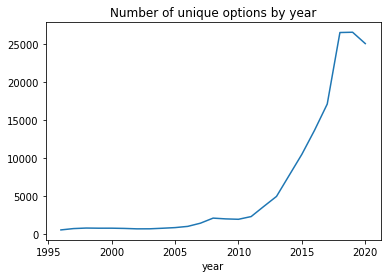

In [5]:
data['year'] = pd.DatetimeIndex(data["date"]).year
data.groupby('year')['optionid'].nunique().plot(title="Number of unique options by year")

In [6]:
data.dtypes

Unnamed: 0            int64
optionid              int64
date                 object
time_to_maturity    float64
strike_price        float64
best_bid            float64
best_offer          float64
open_interest       float64
delta               float64
gamma               float64
vega                float64
theta               float64
spot                float64
spot_return         float64
VIX                 float64
impl_volatility     float64
ttm_yr              float64
optionid_chg        float64
impvol_chg          float64
year                  int64
dtype: object

In [7]:
data.tail()

,Unnamed: 0,optionid,date,time_to_maturity,strike_price,best_bid,best_offer,open_interest,delta,gamma,vega,theta,spot,spot_return,VIX,impl_volatility,ttm_yr,optionid_chg,impvol_chg,year
5208636,9628315,135757541,2020-11-02,410.0,3975.0,51.8,54.7,30.0,0.170116,0.000396,881.2830,-63.12769,3310.239990,0.012243,37.130001,0.181173,1.626984,0.0,-0.014839,2020
5208637,9635448,135757541,2020-11-03,409.0,3975.0,63.3,67.1,30.0,0.196262,0.000423,978.8297,-70.46168,3369.159912,0.017643,35.549999,0.182589,1.623016,0.0,0.007816,2020
5208638,9643318,135757541,2020-11-04,408.0,3975.0,61.0,90.1,30.0,0.221022,0.000456,1071.0920,-74.41212,3443.439941,0.021808,29.570000,0.177826,1.619048,0.0,-0.026086,2020
5208639,9650323,135757541,2020-11-05,407.0,3975.0,92.6,100.0,30.0,0.258562,0.000475,1186.9940,-84.07771,3510.449951,0.019273,27.580000,0.182156,1.615079,0.0,0.024350,2020
5208640,9657695,135757541,2020-11-06,406.0,3975.0,89.4,93.0,57.0,0.252089,0.000480,1169.8420,-81.19736,3509.439941,-0.000288,24.860001,0.178211,1.611111,0.0,-0.021657,2020


## Modeling

In [8]:
from util import split_train_test

In [9]:
train, test = split_train_test(data, 0.9)

In [10]:
print(len(train.optionid.unique()), "training samples and", len(test.optionid.unique()), "testing samples.")

119168 training samples and 13241 testing samples.


In [11]:
train.tail()

,Unnamed: 0,optionid,date,time_to_maturity,strike_price,best_bid,best_offer,open_interest,delta,gamma,vega,theta,spot,spot_return,VIX,impl_volatility,ttm_yr,optionid_chg,impvol_chg,year
4686456,9628315,135757541,2020-11-02,410.0,3975.0,51.8,54.7,30.0,0.170116,0.000396,881.2830,-63.12769,3310.239990,0.012243,37.130001,0.181173,1.626984,0.0,-0.014839,2020
4686457,9635448,135757541,2020-11-03,409.0,3975.0,63.3,67.1,30.0,0.196262,0.000423,978.8297,-70.46168,3369.159912,0.017643,35.549999,0.182589,1.623016,0.0,0.007816,2020
4686458,9643318,135757541,2020-11-04,408.0,3975.0,61.0,90.1,30.0,0.221022,0.000456,1071.0920,-74.41212,3443.439941,0.021808,29.570000,0.177826,1.619048,0.0,-0.026086,2020
4686459,9650323,135757541,2020-11-05,407.0,3975.0,92.6,100.0,30.0,0.258562,0.000475,1186.9940,-84.07771,3510.449951,0.019273,27.580000,0.182156,1.615079,0.0,0.024350,2020
4686460,9657695,135757541,2020-11-06,406.0,3975.0,89.4,93.0,57.0,0.252089,0.000480,1169.8420,-81.19736,3509.439941,-0.000288,24.860001,0.178211,1.611111,0.0,-0.021657,2020


In [12]:
test.tail()

,Unnamed: 0,optionid,date,time_to_maturity,strike_price,best_bid,best_offer,open_interest,delta,gamma,vega,theta,spot,spot_return,VIX,impl_volatility,ttm_yr,optionid_chg,impvol_chg,year
522175,9906839,135757510,2020-12-23,86.0,3950.0,26.5,26.9,2590.0,0.182130,0.000947,470.0889,-148.9563,3690.010010,0.000746,23.309999,0.156499,0.341270,0.0,-0.037302,2020
522176,9915418,135757510,2020-12-24,85.0,3950.0,25.0,25.6,2590.0,0.181172,0.000992,467.4276,-142.5770,3703.060059,0.003530,21.530001,0.149377,0.337302,0.0,-0.045508,2020
522177,9924098,135757510,2020-12-28,81.0,3950.0,30.9,31.4,2590.0,0.213303,0.001094,507.9078,-165.0057,3735.360107,0.008685,21.700001,0.151794,0.321429,0.0,0.016181,2020
522178,9932687,135757510,2020-12-29,80.0,3950.0,32.7,33.1,2590.0,0.215614,0.001055,506.7637,-175.9261,3727.040039,-0.002230,23.080000,0.159716,0.317460,0.0,0.052189,2020
522179,9941567,135757510,2020-12-30,79.0,3950.0,32.3,32.8,2592.0,0.216549,0.001076,505.4956,-175.5769,3732.040039,0.001341,22.770000,0.157835,0.313492,0.0,-0.011777,2020
